In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
B_spots = list(map(str, list(range(13, 43)) + [3743, 3844, 3945, 4046, 4147, 4248] + list(range(43, 55)) + [4955, 5056, 5157, 5258, 5359, 5460] + list(range(55, 67)) + [6167, 6268, 6369, 6470, 6571, 6672] + list(range(67, 79)) + [7379, 7480, 7581, 7682, 7783, 7884] + list(range(79, 103))))
C_spots = list(map(str, list(range(49, 97))))
D_spots = list(map(lambda x: f"{x:02}", range(1, 101)))

spots_dict = {'B': B_spots, 'C': C_spots, 'D': D_spots}
levels_dict = {'B': 6, 'C': 6, 'D': 5}

In [3]:
def clean_and_read():
    files = os.listdir() 
    files = [f for f in files if f.endswith('.xlsx') if "Grupplista" in f]
    df = pd.read_excel(files[0])

    df = df[["Förnamn", "Efternamn", "Telefon 1", "Telefon 2", "Kommentar", "Referens", "Erlagt", "Belopp"]]

    df = df[df["Kommentar"] != ""]
    df["Kommentar"] = df["Kommentar"].str.replace(" ", "")

    df["Namn"] = df["Förnamn"] + " " + df["Efternamn"]
    df = df.drop(["Förnamn", "Efternamn"], axis=1)

    df["Betald"] = df["Erlagt"] >= df["Belopp"]
    df = df.drop(["Erlagt", "Belopp"], axis=1)

    df = df[["Namn", "Telefon 1", "Telefon 2", "Kommentar", "Betald"]]
    df = df.sort_values(by="Kommentar")

    return df

df = clean_and_read()

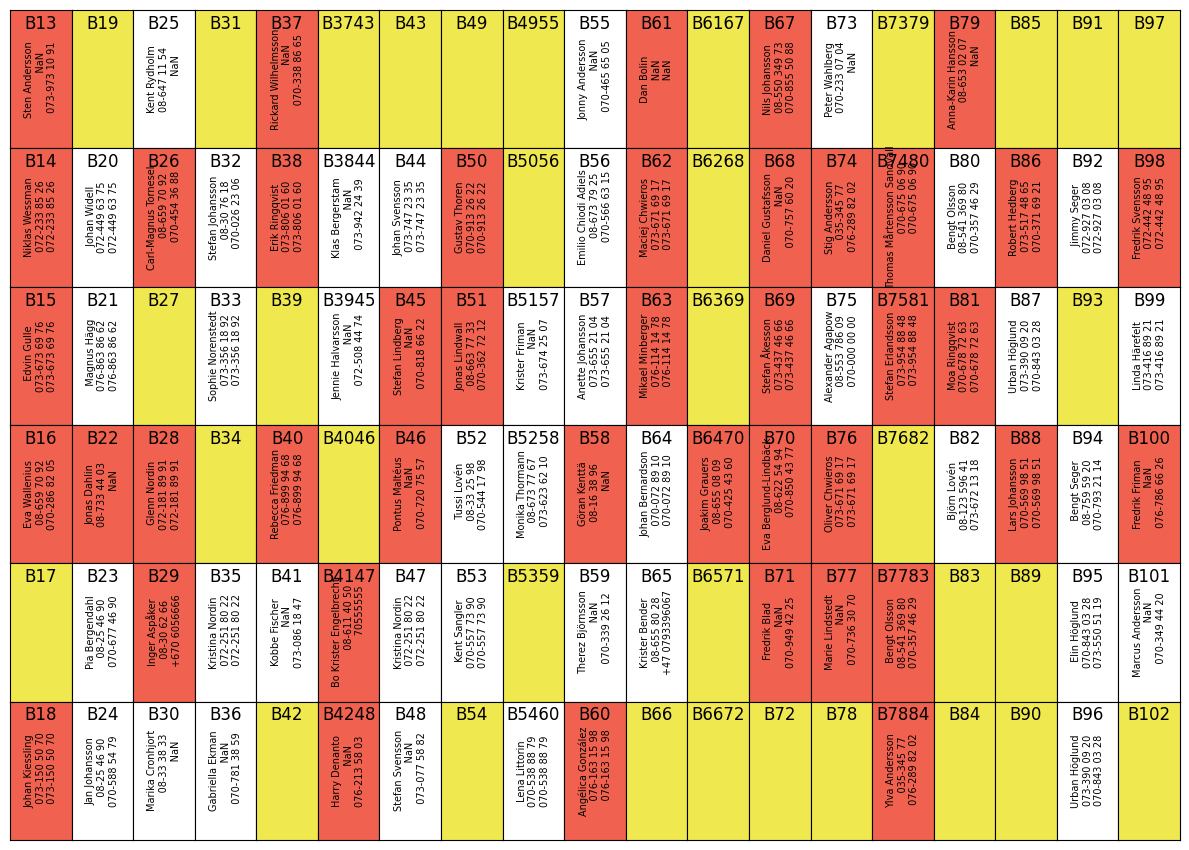

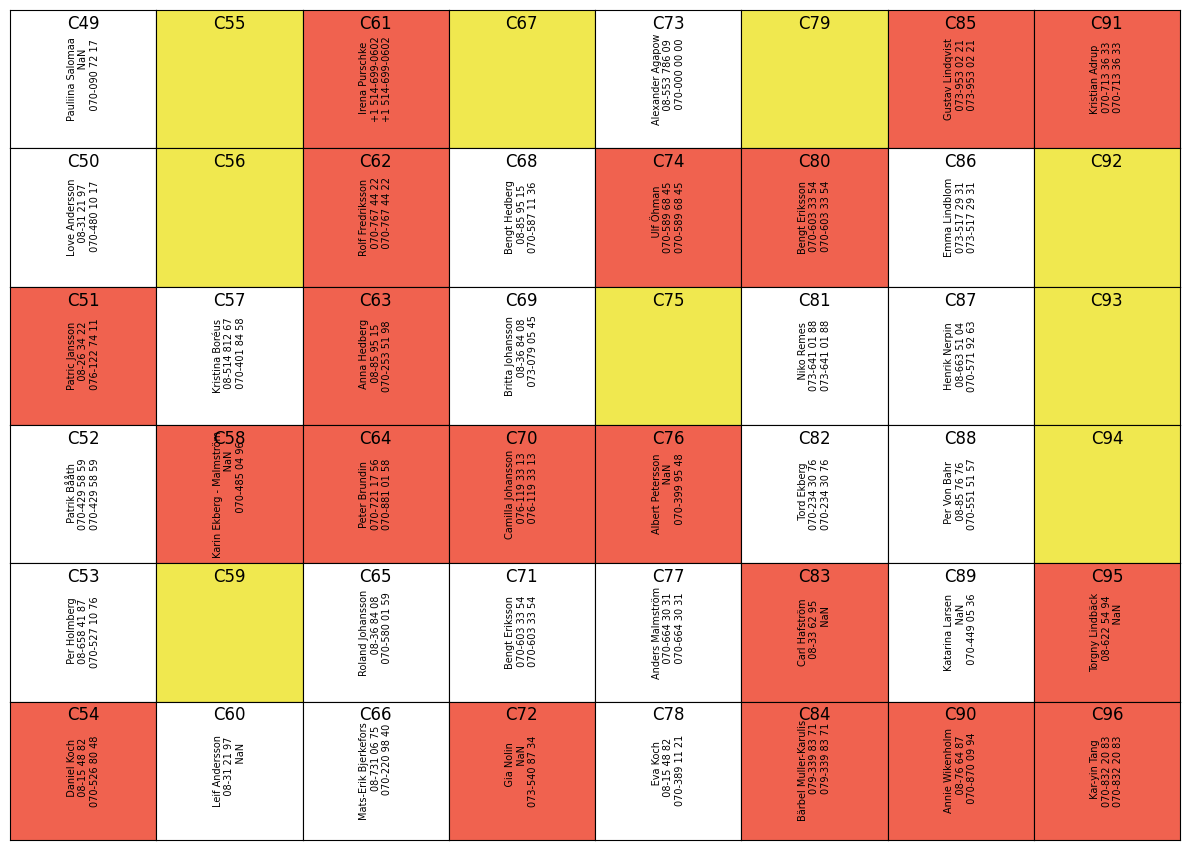

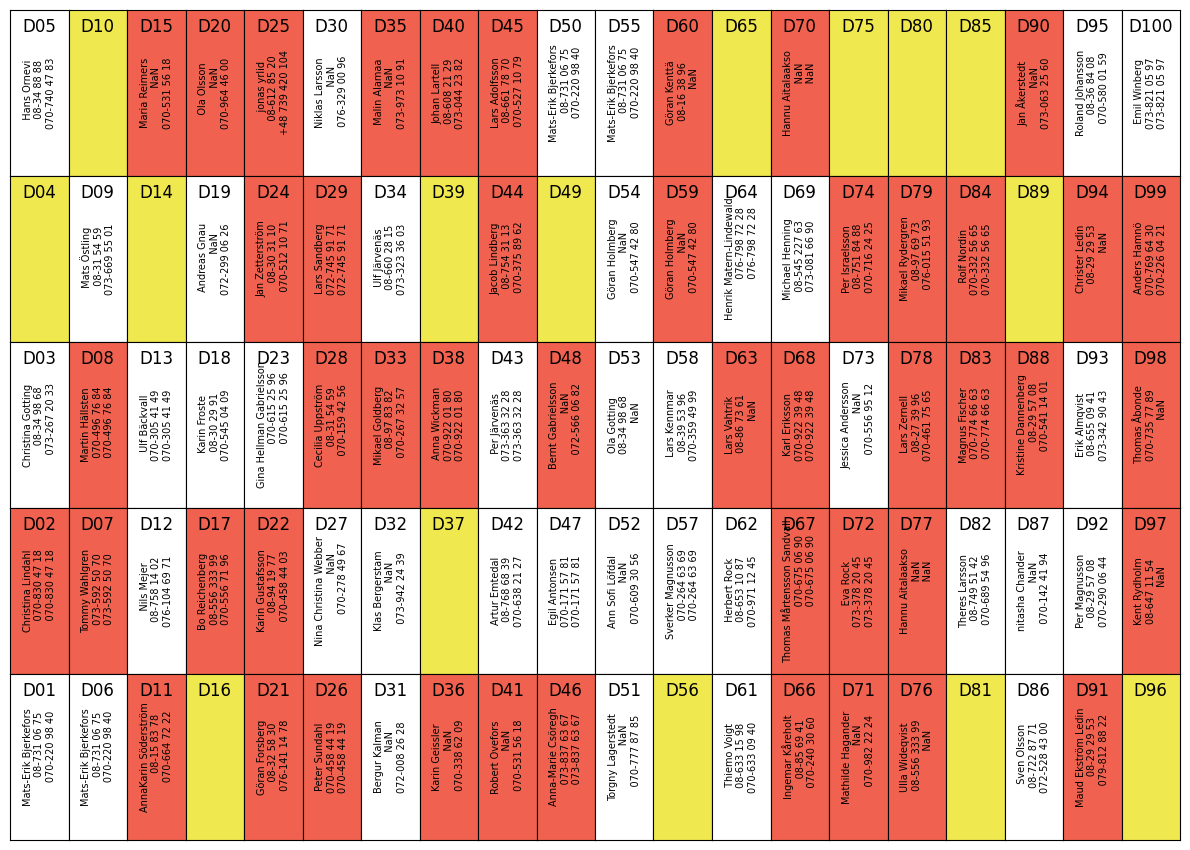

In [4]:
def full_summary(df):
    letters = df["Kommentar"].str[0].unique()
    letters = [let for let in letters if str(let) != "nan"]

    for let in letters:
        sub_df = df[df["Kommentar"].str[0] == let]
        storage_summary(sub_df, let)

def storage_summary(df, letter):
    n_rows = levels_dict[letter]
    n_cols = int(np.ceil(len(spots_dict[letter]) / n_rows))
    spots = spots_dict[letter]

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(11.7, 8.3))  # A4 landscape

    for col in range(n_cols):
        for row in (range(n_rows)):
                
            idx = col * n_rows + row
            spot_name = letter + spots[idx]

            if letter == "D": # I D-förrådet räknas platserna nerifrån och upp
                row = n_rows - row - 1

            ax[row, col].text(0.5, 0.9, spot_name, ha="center", va="center", fontsize=12)
            if spot_name in df["Kommentar"].values:
                text = df[df["Kommentar"] == spot_name].drop(columns=["Kommentar", "Betald"]).iloc[0].to_string(header=False, index=False)
                ax[row, col].text(0.5, 0.5, text, ha="center", va="center", wrap=True, fontsize=7, rotation=90)

                if not df[df["Kommentar"] == spot_name]["Betald"].values[0]: # Rödmarkera obetalda
                    ax[row, col].set_facecolor("#f0624f")
            else:
                ax[row, col].set_facecolor("#f0e84f") # Gulmarkera tomma platser
            ax[row, col].set_xticks([])  # Hide x-axis
            ax[row, col].set_yticks([])  # Hide y-axis

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    plt.savefig(f"{letter} förråd.pdf", bbox_inches='tight')

full_summary(df)

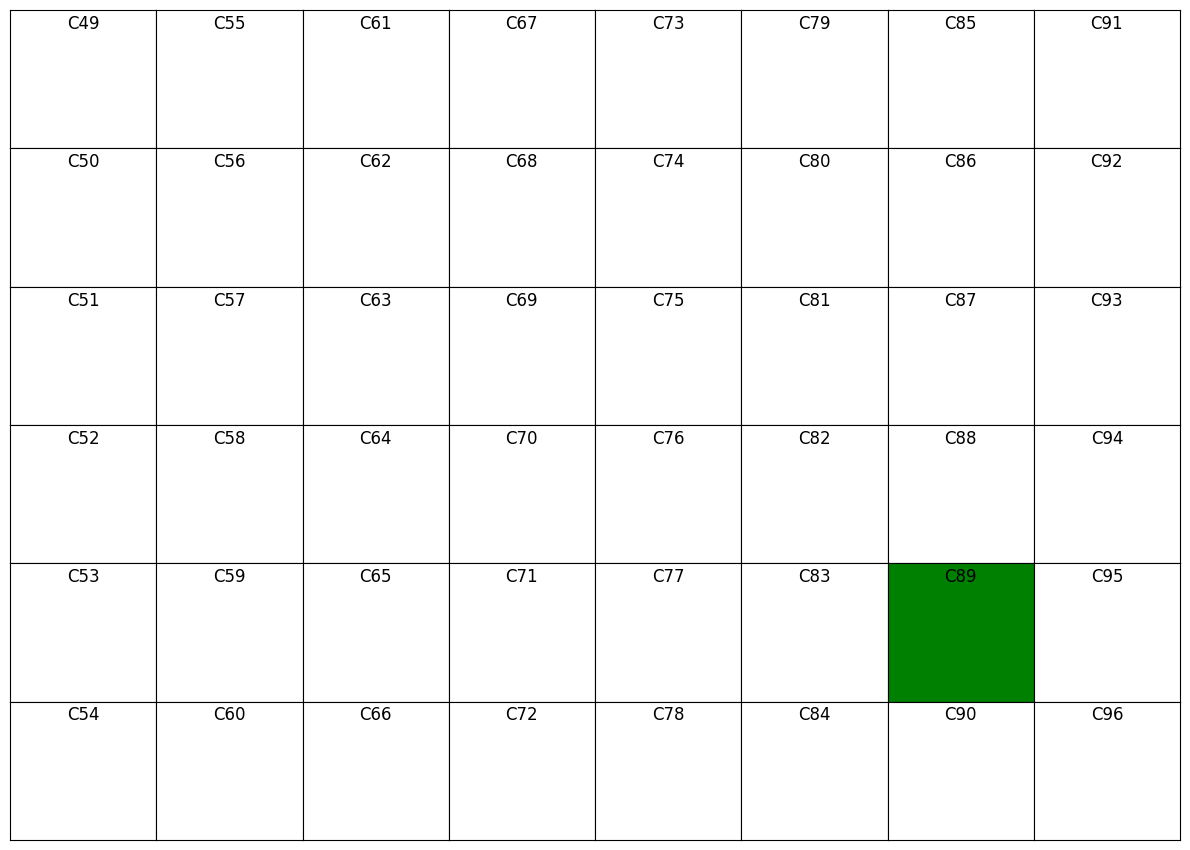

In [5]:
def mark_spot(marked_spot):
    letter = marked_spot[0]
    spot = int(marked_spot[1:])

    n_rows = levels_dict[letter]
    n_cols = int(np.ceil(len(spots_dict[letter]) / n_rows))
    spots = spots_dict[letter]

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(11.7, 8.3))  # A4 landscape

    for col in range(n_cols):
        for row in (range(n_rows)):
                
            idx = col * n_rows + row
            spot_name = letter + spots[idx]

            if letter == "D": # I D-förrådet räknas platserna nerifrån och upp
                row = n_rows - row - 1

            ax[row, col].text(0.5, 0.9, spot_name, ha="center", va="center", fontsize=12)

            if spot_name == marked_spot:
                ax[row, col].set_facecolor("#008000")

            ax[row, col].set_xticks([])  # Hide x-axis
            ax[row, col].set_yticks([])  # Hide y-axis

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    plt.savefig(f"{marked_spot}.pdf", bbox_inches='tight')

mark_spot("C89")